In [1]:
import smbclient
import pandas as pd
from getpass import getpass

# Prompt for credentials

# SMB connection details: NEVER SAVE PASSWORDS IN CODE
server = "file1.intranet.chuv"
share = "data1"
username = input("Enter your CHUV username: ma2591")  # you can also hardcode your username
password = getpass("Enter your CHUV password: ") # NEVER SAVE PASSWORDS IN CODE


smbclient.ClientConfig(username=username, password=password)



In [2]:
file_path = "BIO/80_DATASCIENCE/DATA/IEM/IEM_Molis_2024_12_04_processed.dsv"
full_path = fr"\\{server}\{share}\{file_path}"


with smbclient.open_file(full_path, mode='r', encoding="ISO-8859-1") as file:
    df = pd.read_csv(file, sep="|", encoding="ISO-8859-1")

In [3]:
df

,IPP,NUMERO_SEJOUR,DATE_NAISSANCE,SEXE_CODE,CODE_TEST_MOLIS,NUMERO_BON,DATE_PRELEVEMENT,DATE_RECEPTION,DATE_ANALYSE,DATE_IMPRESSION_RAPPORT,...,UNITE,LIB_STATUT_CLASSIFICATION,DETAIL_RESULTAT,COMMENTAIRE,DETAIL_COMMENTAIRE,SITE_ENREGISTREMENT,CODE_LABORATOIRE_TEST,NOM_DEMANDEUR,CODE_SERVICE_DEMANDEUR,RESULTAT
0,2860623.0,722005026.0,25.07.1990,F,AAPRO,2055964931,03.01.2023 03:21:00,03.01.2023 10:23:28,04.01.2023 00:00:00,04.01.2023 12:00:19,...,µmol/L,Normal,NaN,NaN,NaN,DPM,LCC,ICH- SION CENTRALISATION,ICH- SIon Centralisation,113.0
1,2860623.0,722005026.0,25.07.1990,F,AAILE,2055964931,03.01.2023 03:21:00,03.01.2023 10:23:28,04.01.2023 00:00:00,04.01.2023 12:00:19,...,µmol/L,Normal,NaN,NaN,NaN,DPM,LCC,ICH- SION CENTRALISATION,ICH- SIon Centralisation,48.0
2,2860623.0,722005026.0,25.07.1990,F,AA5ALA,2055964931,03.01.2023 03:21:00,03.01.2023 10:23:28,04.01.2023 00:00:00,04.01.2023 12:00:19,...,µmol/L,Aucun critère de normalité,nd,NaN,NaN,DPM,LCC,ICH- SION CENTRALISATION,ICH- SIon Centralisation,Non detectable
3,2860623.0,722005026.0,25.07.1990,F,AASER,2055964931,03.01.2023 03:21:00,03.01.2023 10:23:28,04.01.2023 00:00:00,04.01.2023 12:00:19,...,µmol/L,Bas,NaN,NaN,NaN,DPM,LCC,ICH- SION CENTRALISATION,ICH- SIon Centralisation,41.0
4,3476175.0,722072690.0,23.02.2022,M,SEQAA,2056025518,03.01.2023 09:30:00,03.01.2023 13:37:33,03.01.2023 00:00:00,04.01.2023 09:20:25,...,NaN,Aucun critère de normalité,NaN,NaN,NaN,DPM,LCC,HUG- EXPEDITION CENTRALE DES A,HUG- Exp. centrale des analyses,007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442028,3571012.0,723202750.0,14.04.2017,M,AAILE,2056927355,20.11.2024 10:45:00,20.11.2024 13:06:28,21.11.2024 00:00:00,26.11.2024 14:16:47,...,µmol/L,Normal,NaN,NaN,NaN,DPM,LCC,PED/BH/CONSUL METAB.ET MOLE,PED - Consultation pédiatrique des,40.0
442029,3612077.0,724082182.0,15.11.2022,F,RC3C4,8104198625,08.11.2024 10:44:00,08.11.2024 10:45:48,08.11.2024 00:00:00,26.11.2024 14:17:46,...,NaN,Aucun critère de normalité,NaN,NaN,NaN,DPM,LCC,PED/BH/CONSUL METAB.ET MOLE,PED - Consultation pédiatrique des,4.83
442030,3423366.0,724093977.0,28.06.2021,M,UOGLYCO,2043376265,21.11.2024 09:15:00,21.11.2024 13:00:26,25.11.2024 00:00:00,26.11.2024 13:17:56,...,mmol/mol creatinine,Normal,NaN,NaN,NaN,DPM,LCC,PERALTA MARIA,Peralta Maria,42.0
442031,3612077.0,724082182.0,15.11.2022,F,AAAAD,8104198625,08.11.2024 10:44:00,08.11.2024 10:45:48,11.11.2024 00:00:00,26.11.2024 14:17:46,...,µmol/L,Haut,NaN,NaN,NaN,DPM,LCC,PED/BH/CONSUL METAB.ET MOLE,PED - Consultation pédiatrique des,<5


Start cleaning

In [3]:
# drop empty columns
reduced = df.drop(['DETAIL_COMMENTAIRE'], axis='columns')

# drop repeated information
reduced = reduced.drop(['RESULTAT_NUMERIQUE','RESULTAT_TEXTE_STD','DETAIL_RESULTAT', 'RESULTAT_TEXTE', 'DATE_RECEPTION','DATE_ANALYSE', 'DATE_IMPRESSION_RAPPORT','CODE_SERVICE_DEMANDEUR'], axis='columns')

# drop unnecessary information
reduced = reduced.drop(['COMMENTAIRE', 'LIB_TYPE_RESULTAT', 'SITE_ENREGISTREMENT','CODE_LABORATOIRE_TEST'], axis='columns')

In [20]:
reduced

,IPP,NUMERO_SEJOUR,DATE_NAISSANCE,SEXE_CODE,CODE_TEST_MOLIS,NUMERO_BON,DATE_PRELEVEMENT,LIB_TEST_MOLIS,UNITE,LIB_STATUT_CLASSIFICATION,NOM_DEMANDEUR,RESULTAT
0,2860623.0,722005026.0,25.07.1990,F,AAPRO,2055964931,03.01.2023 03:21:00,PRO SANG,µmol/L,Normal,ICH- SION CENTRALISATION,113.0
1,2860623.0,722005026.0,25.07.1990,F,AAILE,2055964931,03.01.2023 03:21:00,ILE SANG,µmol/L,Normal,ICH- SION CENTRALISATION,48.0
2,2860623.0,722005026.0,25.07.1990,F,AA5ALA,2055964931,03.01.2023 03:21:00,5-ALA SANG,µmol/L,Aucun critère de normalité,ICH- SION CENTRALISATION,Non detectable
3,2860623.0,722005026.0,25.07.1990,F,AASER,2055964931,03.01.2023 03:21:00,SER SANG,µmol/L,Bas,ICH- SION CENTRALISATION,41.0
4,3476175.0,722072690.0,23.02.2022,M,SEQAA,2056025518,03.01.2023 09:30:00,NUM SEQ AA,NaN,Aucun critère de normalité,HUG- EXPEDITION CENTRALE DES A,007
...,...,...,...,...,...,...,...,...,...,...,...,...
442028,3571012.0,723202750.0,14.04.2017,M,AAILE,2056927355,20.11.2024 10:45:00,ILE SANG,µmol/L,Normal,PED/BH/CONSUL METAB.ET MOLE,40.0
442029,3612077.0,724082182.0,15.11.2022,F,RC3C4,8104198625,08.11.2024 10:44:00,C3 - C4 RATIO,NaN,Aucun critère de normalité,PED/BH/CONSUL METAB.ET MOLE,4.83
442030,3423366.0,724093977.0,28.06.2021,M,UOGLYCO,2043376265,21.11.2024 09:15:00,GLYCOLATE,mmol/mol creatinine,Normal,PERALTA MARIA,42.0
442031,3612077.0,724082182.0,15.11.2022,F,AAAAD,8104198625,08.11.2024 10:44:00,AAD SANG,µmol/L,Haut,PED/BH/CONSUL METAB.ET MOLE,<5


Reformatting according to Numéro de Bon

In [4]:
# Pivot the DataFrame so that each parameter (Code_Test_Molis) becomes a column
pivot_reduced = reduced.pivot_table(index='NUMERO_BON', columns='CODE_TEST_MOLIS', values='RESULTAT', aggfunc='first')

# Reset the index to make the 'numero_bon' a regular column
pivot_reduced.reset_index(inplace=True)

# Display the reformatted DataFrame
print(pivot_reduced)


CODE_TEST_MOLIS  NUMERO_BON AA1MH AA3MH          AA5ALA AAAAD AAABU AAAILE  \
0                2039025368   NaN   NaN             NaN   NaN   NaN    NaN   
1                2039025375   NaN   NaN             NaN   NaN   NaN    NaN   
2                2039025382   NaN   NaN             NaN   NaN   NaN    NaN   
3                2039025399   NaN   NaN             NaN   NaN   NaN    NaN   
4                2039025405   NaN   NaN             NaN   NaN   NaN    NaN   
...                     ...   ...   ...             ...   ...   ...    ...   
5221             8124133558   NaN   NaN             NaN   NaN   NaN    NaN   
5222             8124176903   NaN   NaN             NaN   NaN   NaN    NaN   
5223             8124226925   NaN   NaN             NaN   NaN   NaN    NaN   
5224             8163087556    <5    <5  Non detectable    <5  21.0     <3   
5225             8163808283   NaN   NaN             NaN   NaN   NaN    NaN   

CODE_TEST_MOLIS  AAALA           AAANS AAARG  ... UOSUCC UOSUCC

In [5]:

# Now, to keep the other columns (e.g., 'date_of_birth', 'sex_code', 'IPP'), 
# we'll merge them back with the pivoted dataframe. We can do this by grouping 
# by 'NUMERO_BON' and aggregating the other columns using 'first'.

# Select the other columns you want to keep and group by 'NUMERO_BON'
other_columns = ['NUMERO_BON','NUMERO_SEJOUR', 'DATE_NAISSANCE', 'SEXE_CODE','DATE_PRELEVEMENT', 'UNITE', 'LIB_STATUT_CLASSIFICATION', 'IPP', 'NOM_DEMANDEUR']
additional_info = reduced[other_columns].drop_duplicates(subset=['NUMERO_BON'])

# Merge the pivoted DataFrame with the additional information
clean = pd.merge(pivot_reduced, additional_info, on='NUMERO_BON', how='left')

# Display the final reformatted DataFrame
print(clean)

      NUMERO_BON AA1MH AA3MH          AA5ALA AAAAD AAABU AAAILE  AAALA  \
0     2039025368   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
1     2039025375   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
2     2039025382   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
3     2039025399   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
4     2039025405   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
...          ...   ...   ...             ...   ...   ...    ...    ...   
5221  8124133558   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
5222  8124176903   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
5223  8124226925   NaN   NaN             NaN   NaN   NaN    NaN    NaN   
5224  8163087556    <5    <5  Non detectable    <5  21.0     <3  310.0   
5225  8163808283   NaN   NaN             NaN   NaN   NaN    NaN    NaN   

               AAANS AAARG  ... UOVANMAN        UOVANPYR NUMERO_SEJOUR  \
0                NaN   NaN  ...      

# Identify cases of the same sample split into multiple 'Numéro_bon'

In [6]:
# Identify rows where DATE_PRELEVEMENT, NUMERO_SEJOUR, and IPP match in multiple rows
matching_rows = clean[clean.duplicated(subset=['DATE_PRELEVEMENT', 'IPP', 'NUMERO_SEJOUR'], keep=False)]

# Group matching rows by 'IPP'
grouped = matching_rows.groupby('IPP')

# Create an empty list to store DataFrames
grouped_dfs = []

# Iterate over each group, saving it to a list of DataFrames
for ipp, group in grouped:
    # Append the DataFrame to the list
    grouped_dfs.append(group)

# Now you can combine all grouped DataFrames into one DataFrame
all_grouped_data = pd.concat(grouped_dfs, ignore_index=True)

# Print the final combined DataFrame
print("All matched rows grouped by IPP:")
print(all_grouped_data)


All matched rows grouped by IPP:
      NUMERO_BON AA1MH AA3MH          AA5ALA AAAAD AAABU          AAAILE  \
0     8103882464   NaN   NaN             NaN   NaN   NaN             NaN   
1     8113882464   NaN   NaN             NaN   NaN   NaN             NaN   
2     8103988210  20.0   5.0  Non detectable    <5  34.0              <3   
3     8113988210   NaN   NaN             NaN   NaN   NaN             NaN   
4     2056090233  33.0   6.0  Non detectable    <5  36.0              <3   
...          ...   ...   ...             ...   ...   ...             ...   
1636  8114219127   NaN   NaN             NaN   NaN   NaN             NaN   
1637  2054976706   NaN   NaN             NaN   NaN   NaN             NaN   
1638  2055895594    <5    <5  Non detectable    <5  16.0  Non detectable   
1639  8104233405   NaN   NaN             NaN   NaN   NaN             NaN   
1640  8114233405   NaN   NaN             NaN   NaN   NaN             NaN   

      AAALA           AAANS AAARG  ... UOVANMAN       

646 distinct numéros de séjour. I.e., we have 646 cases of repeats. 

The goal is to merge all rows with the same combination of these three columns into one, and for each column, combine the values where they exist.

In [7]:
merged_clean = clean.groupby(['DATE_PRELEVEMENT', 'IPP', 'NUMERO_SEJOUR'], as_index=False).agg(lambda x: x.fillna(method='ffill').fillna(method='bfill').iloc[0])

# Print the merged DataFrame
print("Merged DataFrame:")
print(merged_clean)

C:\Users\ma2591\AppData\Local\Temp\ipykernel_8252\2801191710.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_clean = clean.groupby(['DATE_PRELEVEMENT', 'IPP', 'NUMERO_SEJOUR'], as_index=False).agg(lambda x: x.fillna(method='ffill').fillna(method='bfill').iloc[0])
C:\Users\ma2591\AppData\Local\Temp\ipykernel_8252\2801191710.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_clean = clean.groupby(['DATE_PRELEVEMENT', 'IPP', 'NUMERO_SEJOUR'], as_index=False).agg(lambda x: x.fillna(method='ffill').fillna(method='bfill').iloc[0])


Merged DataFrame:
         DATE_PRELEVEMENT        IPP  NUMERO_SEJOUR  NUMERO_BON  \
0     01.01.2023 08:45:00  3506840.0    722203094.0  2054105182   
1     01.01.2023 17:30:00  3506840.0    722203094.0  2056025563   
2     01.02.2023 00:00:00  2487756.0    723022332.0  2055497392   
3     01.02.2023 00:00:00  3146050.0    723021618.0  2055497378   
4     01.02.2023 00:00:00  3275395.0    323012486.0  2200671665   
...                   ...        ...            ...         ...   
4352  31.10.2024 10:00:00  3340994.0    720140227.0  2055767877   
4353  31.10.2024 11:15:00  3165405.0    724183797.0  2057131232   
4354  31.10.2024 14:11:00  1102886.0    324121396.0  8104188622   
4355  31.10.2024 15:07:00  2706763.0    323121215.0  8104188761   
4356  31.12.2023 10:55:00  3590054.0    724000554.0  2056969799   

               AA1MH           AA3MH          AA5ALA AAAAD AAABU  \
0                NaN             NaN             NaN   NaN   NaN   
1                NaN             NaN     

Went from 5226 rows to 4357

From 1 121 674 empty cells (70%) to 864 908 (64%)

Rows with missing values before: 100%. Now: 4143 rows with missing values, = 95.1%

In [8]:
# merge the data using a less-than-or-equal-to 12-hour time discrepency between samples


# Convert 'DATE_PRELEVEMENT' to datetime using the correct format
clean['DATE_PRELEVEMENT'] = pd.to_datetime(clean['DATE_PRELEVEMENT'], format="%d.%m.%Y %H:%M:%S")

# Sort by IPP, NUMERO_SEJOUR, and DATE_PRELEVEMENT
clean = clean.sort_values(by=['IPP', 'NUMERO_SEJOUR', 'DATE_PRELEVEMENT'])

# Function to merge rows within a 12-hour window for the same IPP and NUMERO_SEJOUR
def merge_rows_within_12_hours(group):
    merged_rows = []  # List to hold the merged rows
    current_group = [group.iloc[0]]  # Start with the first row
    
    for i in range(1, len(group)):
        # Check the time difference between the current row and the last row in the group
        time_diff = (group['DATE_PRELEVEMENT'].iloc[i] - group['DATE_PRELEVEMENT'].iloc[i-1]).total_seconds() / 3600.0
        
        # If the time difference is less than or equal to 12 hours, merge the rows
        if time_diff <= 12:
            # Merge the two rows by combining their values
            merged_row = group.iloc[i].combine_first(group.iloc[i-1])  # Take non-NaN values from both rows
            current_group[-1] = merged_row  # Replace the last row in the current group with the merged row
        else:
            # If time difference exceeds 12 hours, add the current group to the result
            merged_rows.append(pd.concat(current_group, axis=1, ignore_index=True).T)  # Concatenate the group DataFrames
            current_group = [group.iloc[i]]  # Start a new group with the current row
    
    # Add the last group if any
    if current_group:
        merged_rows.append(pd.concat(current_group, axis=1, ignore_index=True).T)
    
    # Concatenate all the merged groups together
    return pd.concat(merged_rows, ignore_index=True)

# Apply the function to each group (grouped by IPP and NUMERO_SEJOUR)
merged_clean_v2 = clean.groupby(['IPP', 'NUMERO_SEJOUR'], as_index=False).apply(merge_rows_within_12_hours)


columns = merged_clean_v2.columns.tolist()

desired_order = ['NUMERO_BON', 'IPP', 'NUMERO_SEJOUR', 'DATE_PRELEVEMENT'] + [col for col in columns if col not in ['NUMERO_BON', 'IPP', 'NUMERO_SEJOUR', 'DATE_PRELEVEMENT']]

# Reorder the DataFrame columns
merged_clean_v2 = merged_clean_v2[desired_order]

# Print the merged DataFrame
print("Merged DataFrame:")
print(merged_clean_v2)


Merged DataFrame:
        NUMERO_BON        IPP NUMERO_SEJOUR     DATE_PRELEVEMENT AA1MH AA3MH  \
0    0  8104197473     3979.0   324129749.0  2024-11-05 00:00:00   NaN   NaN   
1    0  8103183349     3979.0   721194796.0  2023-05-12 11:59:00   NaN   NaN   
     1  8103505493     3979.0   721194796.0  2023-11-09 10:29:00   NaN   NaN   
     2  8113882464     3979.0   721194796.0  2024-05-15 10:12:00   NaN   NaN   
2    0  2050071245    15875.0   723163963.0  2023-09-04 08:00:00   NaN   NaN   
...            ...        ...           ...                  ...   ...   ...   
2558 0  2058146846  3643479.0   724195754.0  2024-11-19 00:00:00  21.0    <5   
2559 0  2058146853  3643482.0   724195763.0  2024-11-18 00:00:00    <5    <5   
2560 0  2058147416  3643871.0   724197168.0  2024-11-22 09:30:00   NaN   NaN   
2561 0  2058050563  3644074.0   724197802.0  2024-11-22 14:30:00    <5    <5   
2562 0  2057643827  3644439.0   724199057.0  2024-11-25 11:45:00   NaN   NaN   

                AA5AL

C:\Users\ma2591\AppData\Local\Temp\ipykernel_8252\496945607.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_clean_v2 = clean.groupby(['IPP', 'NUMERO_SEJOUR'], as_index=False).apply(merge_rows_within_12_hours)


3 641 rows 

Rows with missing values 91.2%
319 complete rows

61.1% of empty cells

In [9]:
# create a column for summary information on each row. This can be deleted later, but it's nice to have for now

# Calculate the percentage of missing values for each row
merged_clean_v2['ROW_SUMMARY'] = merged_clean_v2.isna().mean(axis=1) * 100

# Reorder the columns to place 'row summary' as the first column
columns = ['ROW_SUMMARY'] + [col for col in merged_clean_v2.columns if col != 'ROW_SUMMARY']

# Reorder the DataFrame columns
merged_clean_v2 = merged_clean_v2[columns]

print(merged_clean_v2)


        ROW_SUMMARY  NUMERO_BON        IPP NUMERO_SEJOUR     DATE_PRELEVEMENT  \
0    0    79.220779  8104197473     3979.0   324129749.0  2024-11-05 00:00:00   
1    0    78.896104  8103183349     3979.0   721194796.0  2023-05-12 11:59:00   
     1    78.896104  8103505493     3979.0   721194796.0  2023-11-09 10:29:00   
     2    36.038961  8113882464     3979.0   721194796.0  2024-05-15 10:12:00   
2    0    78.896104  2050071245    15875.0   723163963.0  2023-09-04 08:00:00   
...             ...         ...        ...           ...                  ...   
2558 0    78.896104  2058146846  3643479.0   724195754.0  2024-11-19 00:00:00   
2559 0    78.896104  2058146853  3643482.0   724195763.0  2024-11-18 00:00:00   
2560 0    78.896104  2058147416  3643871.0   724197168.0  2024-11-22 09:30:00   
2561 0    60.714286  2058050563  3644074.0   724197802.0  2024-11-22 14:30:00   
2562 0    92.857143  2057643827  3644439.0   724199057.0  2024-11-25 11:45:00   

       AA1MH AA3MH         

To check progression of an individual over time

In [21]:
# Filter rows where IPP equals 664610
data_215540 = merged_clean_v2[merged_clean_v2['IPP'] == data_21554.0]

# Display the filtered DataFrame
print(data_215540)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (801154292.py, line 2)

In [20]:
# Filter rows where IPP equals 664610
data_664610 = merged_clean_v2[merged_clean_v2['IPP'] == 66461.0]

# Display the filtered DataFrame
print(data_664610)


      ROW_SUMMARY  NUMERO_BON      IPP NUMERO_SEJOUR     DATE_PRELEVEMENT  \
20 0    79.220779  8103056177  66461.0   719102266.0  2023-03-02 08:42:00   
   1    77.597403  8103757696  66461.0   719102266.0  2024-03-07 09:20:00   
   2    79.220779  8104163244  66461.0   719102266.0  2024-10-17 08:53:00   

     AA1MH AA3MH AA5ALA AAAAD AAABU  ... UOURI UOVALGLY UOVANIL UOVANMAN  \
20 0   NaN   NaN    NaN   NaN   NaN  ...   NaN      NaN     NaN      NaN   
   1   NaN   NaN    NaN   NaN   NaN  ...   NaN      NaN     NaN      NaN   
   2   NaN   NaN    NaN   NaN   NaN  ...   NaN      NaN     NaN      NaN   

     UOVANPYR DATE_NAISSANCE SEXE_CODE   UNITE   LIB_STATUT_CLASSIFICATION  \
20 0      NaN     19.12.1975         F  µmol/L                      Normal   
   1      NaN     19.12.1975         F  µmol/L  Aucun critère de normalité   
   2      NaN     19.12.1975         F  µmol/L                      Normal   

                   NOM_DEMANDEUR  
20 0  CONSULT MAL RARES ET METAB  
   

In [10]:
# Another example: 

# Find the mode of the 'IPP' column
ipp_mode = merged_clean_v2['IPP'].mode()[0]

# Filter for the highest occurring IPP
data_modeIPP = merged_clean_v2[merged_clean_v2['IPP'] == ipp_mode]

# Display the filtered DataFrame
print(data_modeIPP)


         ROW_SUMMARY  NUMERO_BON        IPP NUMERO_SEJOUR  \
1419 0     95.454545  2056025518  3476175.0   722072690.0   
     1     95.129870  2055920838  3476175.0   722072690.0   
     2     95.129870  2055958169  3476175.0   722072690.0   
     3     95.129870  2055960612  3476175.0   722072690.0   
     4     95.454545  2056120756  3476175.0   722072690.0   
...              ...         ...        ...           ...   
1421 50    95.454545  2058101371  3476175.0   723096178.0   
     51    95.454545  2058147843  3476175.0   723096178.0   
1422 0     95.129870  2056852596  3476175.0   724154512.0   
     1     95.129870  2056852923  3476175.0   724154512.0   
     2     95.129870  2058072473  3476175.0   724154512.0   

            DATE_PRELEVEMENT AA1MH AA3MH AA5ALA AAAAD AAABU  ... UOURI  \
1419 0   2023-01-03 09:30:00   NaN   NaN    NaN   NaN   NaN  ...   NaN   
     1   2023-01-31 09:30:00   NaN   NaN    NaN   NaN   NaN  ...   NaN   
     2   2023-02-14 09:25:00   NaN   NaN    N

# Simple imputation

Convert possible values to numeric: This involves attempting to convert values to numeric using pd.to_numeric(), but we need to handle a few exceptions:
1. Handle 'non detectable' values: If the value is 'non detectable', we'll replace it with 0.
2. Handle values with < or > signs: If the value has a < or > followed by a number, we need to extract the number, divide it by 2, and use that as the value.
3. Remaining non-numeric values: If any other value cannot be converted to a number, we'll replace it with NaN.

In [11]:
import numpy as np

# Create a copy of the DataFrame to avoid modifying the original DataFrame
df_transformed = merged_clean_v2.copy()

# Function to clean and convert values
def convert_to_numeric(val):
    # Handle 'non detectable' values
    if isinstance(val, str) and val.lower() == 'non detectable':
        return 0
    
    # Handle values with < or > followed by a number
    elif isinstance(val, str):
        if '<' in val:
            # Extract number after '<' and divide by 2
            try:
                num = float(''.join(filter(str.isdigit, val)))
                return num / 2
            except ValueError:
                return np.nan
        elif '>' in val:
            # Extract number after '>' and multiply by 2
            try:
                num = float(''.join(filter(str.isdigit, val)))
                return num * 2
            except ValueError:
                return np.nan
    
    # Try to convert other values to numeric
    try:
        return pd.to_numeric(val, errors='raise')
    except (ValueError, TypeError):
        return np.nan



# List of columns to skip
columns_to_skip = ['DATE_PRELEVEMENT', 'DATE_NAISSANCE', 'SEXE_CODE', 'LIB_STATUT_CLASSIFICATION', 'UNITE', 'NOM_DEMANDEUR']

# Apply the function to all columns except the ones in the skip list
for col in df_transformed.columns:
    if col not in columns_to_skip:  # Skip specified columns
        df_transformed[col] = df_transformed[col].apply(convert_to_numeric)


# Print the DataFrame after the transformation
print("\nDataFrame after transforming values:")
print(df_transformed)



DataFrame after transforming values:
        ROW_SUMMARY  NUMERO_BON        IPP  NUMERO_SEJOUR  \
0    0    79.220779  8104197473     3979.0    324129749.0   
1    0    78.896104  8103183349     3979.0    721194796.0   
     1    78.896104  8103505493     3979.0    721194796.0   
     2    36.038961  8113882464     3979.0    721194796.0   
2    0    78.896104  2050071245    15875.0    723163963.0   
...             ...         ...        ...            ...   
2558 0    78.896104  2058146846  3643479.0    724195754.0   
2559 0    78.896104  2058146853  3643482.0    724195763.0   
2560 0    78.896104  2058147416  3643871.0    724197168.0   
2561 0    60.714286  2058050563  3644074.0    724197802.0   
2562 0    92.857143  2057643827  3644439.0    724199057.0   

           DATE_PRELEVEMENT  AA1MH  AA3MH  AA5ALA  AAAAD  AAABU  ...  UOURI  \
0    0  2024-11-05 00:00:00    NaN    NaN     NaN    NaN    NaN  ...    NaN   
1    0  2023-05-12 11:59:00    NaN    NaN     NaN    NaN    NaN  ...   

In [84]:
# Create a copy of the original DataFrame to avoid modifying the original data
df_imputed_mean = df_transformed.copy()

# Impute missing values for numeric columns using the mean of the entire column
df_imputed_mean = df_imputed_mean.apply(
    lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col
)

# Print the DataFrame after imputing missing values by the mean of the entire column
print("\nDataFrame after imputing missing values by the mean of the entire column:")
print(df_imputed_mean)



DataFrame after imputing missing values by the mean of the entire column:
        ROW_SUMMARY  NUMERO_BON        IPP  NUMERO_SEJOUR  \
0    0    79.220779  8104197473     3979.0    324129749.0   
1    0    78.896104  8103183349     3979.0    721194796.0   
     1    78.896104  8103505493     3979.0    721194796.0   
     2    36.038961  8113882464     3979.0    721194796.0   
2    0    78.896104  2050071245    15875.0    723163963.0   
...             ...         ...        ...            ...   
2558 0    78.896104  2058146846  3643479.0    724195754.0   
2559 0    78.896104  2058146853  3643482.0    724195763.0   
2560 0    78.896104  2058147416  3643871.0    724197168.0   
2561 0    60.714286  2058050563  3644074.0    724197802.0   
2562 0    92.857143  2057643827  3644439.0    724199057.0   

           DATE_PRELEVEMENT      AA1MH     AA3MH    AA5ALA     AAAAD  \
0    0  2024-11-05 00:00:00   4.191186  3.271037  0.025129  2.341306   
1    0  2023-05-12 11:59:00   4.191186  3.271037

# PCA

Standardize data

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime


# Drop the 'DATE_PRELEVEMENT' column
# df_imputed_mean = df_imputed_mean.drop(columns=['DATE_PRELEVEMENT'])


# Convert the 'DATE_NAISSANCE' column to datetime (if it's not already)
df_imputed_mean['DATE_NAISSANCE'] = pd.to_datetime(df_imputed_mean['DATE_NAISSANCE'], format='%d.%m.%Y')

# Create a new 'AGE' column based on the date of birth (DATE_NAISSANCE) and today's date
today = datetime.today()
df_imputed_mean['AGE'] = df_imputed_mean['DATE_NAISSANCE'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

# Drop the 'DATE_NAISSANCE' column now that we have the age
df_imputed_mean = df_imputed_mean.drop(columns=['DATE_NAISSANCE'])

# Identify and handle non-numeric columns
# Convert categorical columns to numeric if needed (for example, gender 'M'/'F')
# You can use Label Encoding or One-Hot Encoding for categorical columns like gender
# Here, I'll assume 'GENDER' column is categorical, and we will use label encoding as an example:

if 'GENDER' in df_imputed_mean.columns:
    df_imputed_mean['GENDER'] = df_imputed_mean['GENDER'].map({'M': 1, 'F': 0})  # Encoding 'M' as 1 and 'F' as 0

# Drop any other non-numeric columns if you don't want to encode them
df_imputed_mean = df_imputed_mean.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_imputed_mean)

c:\ProgramData\anaconda3\envs\dataprocessing\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\ProgramData\anaconda3\envs\dataprocessing\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\ProgramData\anaconda3\envs\dataprocessing\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Reduce to 10 dimensions

In [86]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Convert the NumPy array back to a DataFrame
df_standardized = pd.DataFrame(standardized_data)

# Drop columns with missing values
df_standardized_clean = df_standardized.dropna(axis=1)



pca = PCA(n_components=10)  # Reduce to 10 dimensions
data_pca = pca.fit_transform(df_standardized_clean)

# Convert the result to a DataFrame if desired
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

# Show the PCA result
print(pca_df)



           PC1        PC2       PC3       PC4        PC5       PC6       PC7  \
0    -0.034660   1.513635 -0.396488 -0.131595   3.846211  0.298215  1.793113   
1    -0.043298   7.848360  1.843416  3.029428  10.439852  3.092617  3.198764   
2     0.108383  11.741928  3.647579  5.579660  11.654991  3.760153  3.840541   
3    -1.549052   1.938904 -2.274913  1.768347   5.837054 -0.611602  2.945203   
4    -0.214862  -0.645915 -0.543023 -0.527713   0.158675 -0.167197 -0.202293   
...        ...        ...       ...       ...        ...       ...       ...   
3636 -0.697005  -1.389992  0.526191  0.792068   0.068231 -0.124876  0.598971   
3637 -0.577639  -1.454457  0.827794  0.727156   0.098941  0.059157  0.451466   
3638  0.148703   1.534830 -0.371220  1.493961  -1.031381  0.590509 -0.407568   
3639 -0.489870  -1.316878  1.471502  1.678674  -1.423131  0.849334 -0.329303   
3640  0.551556  -0.116319  0.112406  0.308835   0.250535 -0.106354 -0.210012   

           PC8       PC9      PC10  
0 

# Clustering

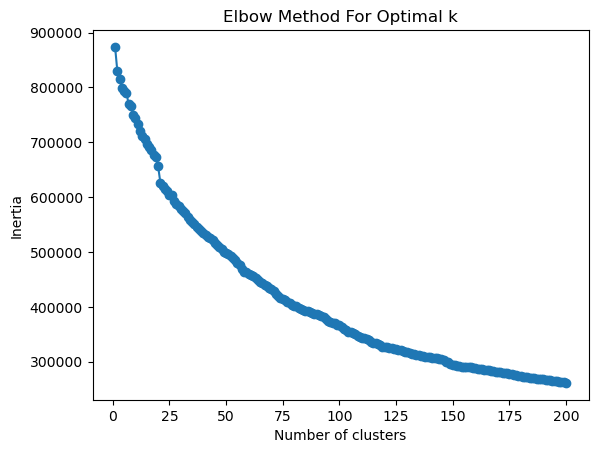

In [64]:
# use the elbow method to determine the ideal number of clusters

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 201)  # Try cluster numbers from 1 to 100
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized_clean)  # Use the clean standardized data
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


10 may not be enough but we'll start with that

In [74]:
# Apply K-means clustering on the reduced data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data_pca)


KMeans(n_clusters=10, random_state=42)

Visualize clusters

C:\Users\ma2591\AppData\Local\Temp\ipykernel_8252\1365202900.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  distinct_colors = plt.cm.get_cmap('Paired', len(np.unique(kmeans.labels_)))


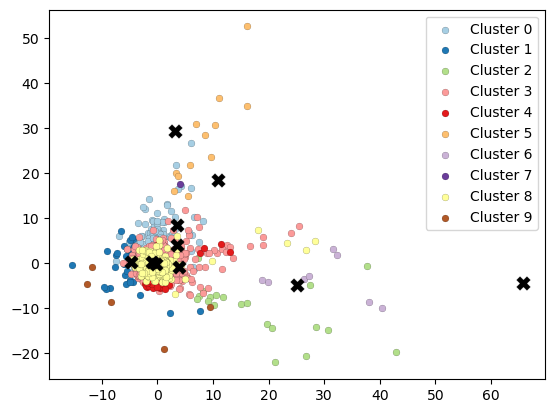

In [78]:
# Define a list of distinct colors
distinct_colors = plt.cm.get_cmap('Paired', len(np.unique(kmeans.labels_)))

# Plot the data points
for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(data_pca[kmeans.labels_ == i, 1], data_pca[kmeans.labels_ == i, 2], 
                c=[distinct_colors(i)], label=f'Cluster {i}', s=25, edgecolors='black', linewidths=0.1)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', edgecolors='black', linewidths=0.1)

# Add a legend to label each cluster
plt.legend()

# Show the plot
plt.show()

I'm curious about that one point, cluster 7, so I will inspect

In [83]:
# Get the label of the cluster of interest
isolated_point_label = 7

# Extract the indices of the points that belong to this cluster
indices = np.where(kmeans.labels_ == isolated_point_label)[0]

# Assuming your original dataset is stored in 'df_imputed_mean', extract the corresponding row(s)
isolated_data = merged_clean_v2.iloc[indices]

# Display the corresponding row(s) from your dataset
print(isolated_data)

        ROW_SUMMARY  NUMERO_BON        IPP NUMERO_SEJOUR     DATE_PRELEVEMENT  \
1761 0    54.220779  2055022549  3550699.0   723087372.0  2023-02-14 09:00:00   

       AA1MH AA3MH AA5ALA AAAAD AAABU  ...           UOURI        UOVALGLY  \
1761 0   NaN   NaN    NaN   NaN   NaN  ...  Non detectable  Non detectable   

       UOVANIL UOVANMAN        UOVANPYR DATE_NAISSANCE SEXE_CODE     UNITE  \
1761 0     #nd      2.0  Non detectable     01.01.1993         M  mmol/mol   

         LIB_STATUT_CLASSIFICATION                 NOM_DEMANDEUR  
1761 0  Aucun critère de normalité  LABO CENTRAL CHIMIE CLINIQUE  

[1 rows x 309 columns]


Try with 80

In [65]:
# Apply K-means clustering on the reduced data
kmeans_80 = KMeans(n_clusters=80, random_state=42)
kmeans_80.fit(data_pca)

KMeans(n_clusters=80, random_state=42)

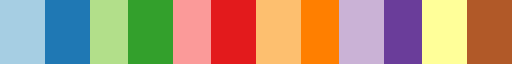

In [68]:
distinct_colors

C:\Users\ma2591\AppData\Local\Temp\ipykernel_8252\242193366.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  distinct_colors = plt.cm.get_cmap('Paired', len(np.unique(kmeans_80.labels_)))


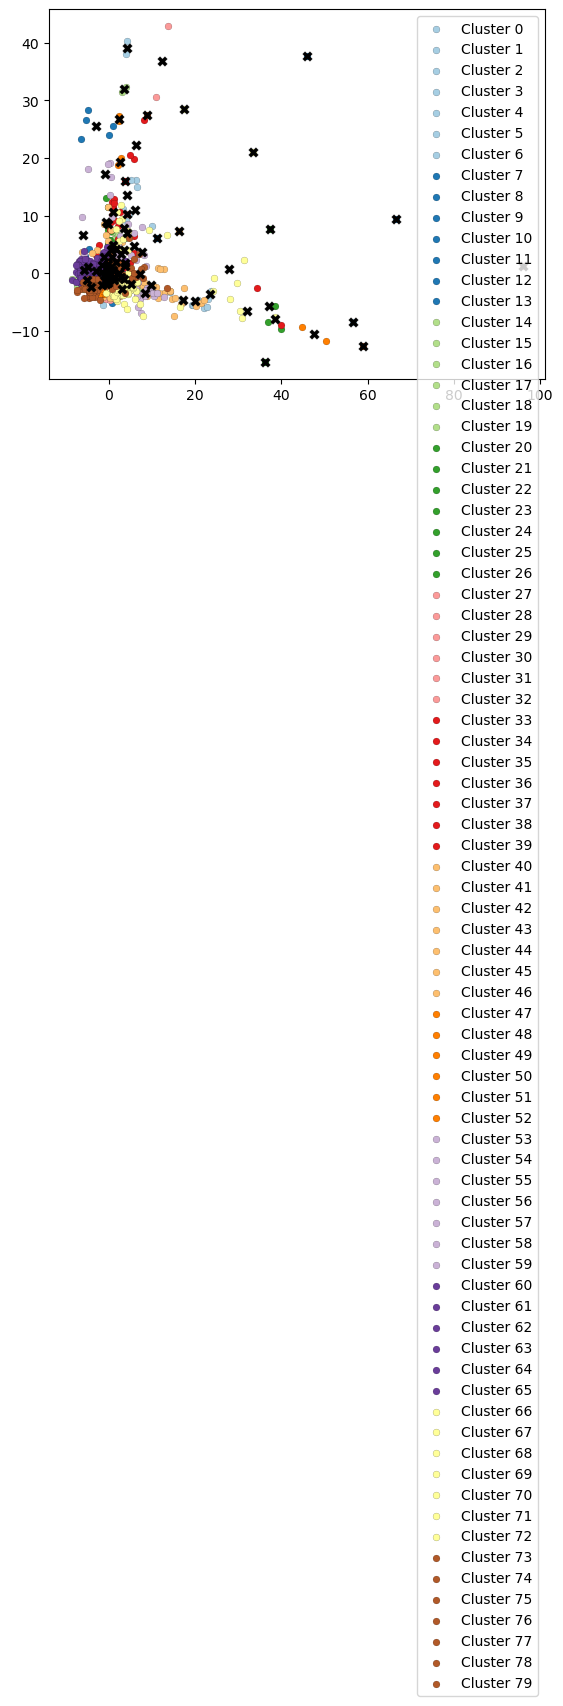

In [80]:
# Define a list of distinct colors
distinct_colors = plt.cm.get_cmap('Paired', len(np.unique(kmeans_80.labels_)))

# Plot the data points
for i in range(len(np.unique(kmeans_80.labels_))):
    plt.scatter(data_pca[kmeans_80.labels_ == i, 0], data_pca[kmeans_80.labels_ == i, 1], 
                c=[distinct_colors(i)], label=f'Cluster {i}', s=25, edgecolors='black', linewidths=0.1)

# Plot the cluster centers
plt.scatter(kmeans_80.cluster_centers_[:, 0], kmeans_80.cluster_centers_[:, 1], marker='X', s=50, color='black', edgecolors='black', linewidths=0.1)

# Add a legend to label each cluster
plt.legend()

# Show the plot
plt.show()

Display cluster profiles

In [57]:
# Add cluster labels to the dataset for easy reference
df_imputed_mean['cluster'] = kmeans.labels_
print(df_imputed_mean)

        ROW_SUMMARY  NUMERO_BON        IPP  NUMERO_SEJOUR      AA1MH  \
0    0    79.220779  8104197473     3979.0    324129749.0   4.250442   
1    0    78.896104  8103183349     3979.0    721194796.0   4.250442   
     1    78.896104  8103505493     3979.0    721194796.0   4.250442   
     2    36.038961  8113882464     3979.0    721194796.0   4.250442   
2    0    78.896104  2050071245    15875.0    723163963.0   4.250442   
...             ...         ...        ...            ...        ...   
2558 0    78.896104  2058146846  3643479.0    724195754.0  21.000000   
2559 0    78.896104  2058146853  3643482.0    724195763.0   2.500000   
2560 0    78.896104  2058147416  3643871.0    724197168.0   4.250442   
2561 0    60.714286  2058050563  3644074.0    724197802.0   2.500000   
2562 0    92.857143  2057643827  3644439.0    724199057.0   4.250442   

           AA3MH    AA5ALA     AAAAD    AAABU   AAAILE  ...    UOTHYM  \
0    0  2.982975  0.017575  2.316578  24.4803  3.89527  ...  2

In [58]:
# Calculate the profile (mean of features in each cluster)
cluster_profiles = df_imputed_mean.groupby('cluster').mean()

# Show the profiles of each cluster
print("Cluster Profiles (mean of features in each cluster):")
print(cluster_profiles)

Cluster Profiles (mean of features in each cluster):
         ROW_SUMMARY    NUMERO_BON           IPP  NUMERO_SEJOUR     AA1MH  \
cluster                                                                     
0          32.289207  4.146290e+09  3.517741e+06   6.217684e+08  2.794727   
1          24.794942  5.884745e+09  3.571268e+06   4.814766e+08  2.638333   
2          51.379870  4.174755e+09  3.537430e+06   5.434581e+08  2.925000   
3          69.876798  4.390490e+09  2.883208e+06   6.668877e+08  4.274886   
4          49.706246  5.659460e+09  2.622499e+06   7.083268e+08  4.208765   
5          22.483766  4.075487e+09  3.545462e+06   6.902455e+08  3.145944   
6          79.788961  2.056461e+09  2.307589e+06   7.222403e+08  4.250442   
7          54.220779  2.055023e+09  3.550699e+06   7.230874e+08  4.250442   
8          26.668535  3.861846e+09  2.963890e+06   6.840593e+08  5.043912   
9          10.844156  8.109437e+09  3.550936e+06   3.230978e+08  3.350088   

             AA3MH    

In [59]:
# Filter and print rows where 'cluster' column equals 9
filtered_df = df_imputed_mean[df_imputed_mean['cluster'] == 9]
print(filtered_df)

        ROW_SUMMARY  NUMERO_BON        IPP  NUMERO_SEJOUR      AA1MH  \
1362 0     0.000000  8103114851  3448393.0    323035211.0   0.000000   
1542 1    36.038961  8113019010  3525426.0    322132824.0   4.250442   
1982 0     0.000000  8113499644  3573869.0    323104007.0   0.000000   
1990 0    18.181818  8103433019  3574319.0    323105116.0  10.000000   
2475 2     0.000000  8114119441  3632674.0    324111626.0   2.500000   

           AA3MH    AA5ALA     AAAAD    AAABU   AAAILE  ...    UOTHYM  \
1362 0  2.500000  1.000000  2.500000  36.0000  0.00000  ...  2.085714   
1542 1  2.982975  0.017575  2.316578  24.4803  3.89527  ...  1.000000   
1982 0  2.500000  0.000000  2.500000  13.0000  0.00000  ...  2.085714   
1990 0  9.000000  0.000000  7.000000  36.0000  0.00000  ...  2.085714   
2475 2  2.500000  0.000000  2.500000  35.0000  0.00000  ...  2.085714   

        UOTIGGLY  UOURAC  UOURI  UOVALGLY   UOVANIL  UOVANMAN  UOVANPYR  AGE  \
1362 0  2.976038     1.0    0.0       0.0  2.278